<a href="https://colab.research.google.com/github/Somu-Gen/WQI_Streamlit/blob/main/year_wise_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import plotly.express as px

In [ ]:
#converting object Data type to date time data type 
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date']

In [ ]:
df['Date'].dt.year

In [ ]:
df['year'] = df['Date'].dt.year

In [ ]:
#Gereting seperate csv file
#df.to_csv("File_name.csv")

In [ ]:
df=pd.read_csv('/content/vellore_Dy.csv')

In [ ]:
df

,Unnamed: 0,sno,Tahsil/Taluk,Village,Latitude,Longitude,Date,TDS,Nitrates,Ca,Mg,Na,K,Cl,SO4,F,pH,wqi,quality,year
0,0,1,Vellore,P.S. Mangalam,"12°55'05""","79°03'00""",1981-01-06,384.519457,13.176923,124.0,86.00,265.0,5.964226,482.0,121.005792,0.626931,7.4,62.518147,Poor,1981
1,1,2,Vellore,Guruvarajapalayam,"12°47'35""","78°53'00""",1981-01-07,484.000000,13.176923,64.0,51.00,53.0,5.964226,53.0,121.005792,0.626931,7.5,59.568941,Poor,1981
2,2,3,Vellore,Perumugai,"12°56'33""","79°11'49""",1981-01-07,384.519457,13.176923,46.0,23.00,62.0,5.964226,78.0,121.005792,0.626931,8.0,60.935806,Poor,1981
3,3,4,Vellore,Karadikudi,"12°50'38""","78°55'49""",1981-01-07,384.519457,13.176923,50.0,57.00,193.0,5.964226,174.0,121.005792,0.626931,8.4,65.567795,Poor,1981
4,4,5,Vellore,Pinnathurai,"12°46'43""","78°56'11""",1981-01-07,384.519457,13.176923,64.0,40.00,127.0,5.964226,82.0,121.005792,0.626931,7.8,60.977494,Poor,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,907,908,Vellore,Permugai,"12°56'33""","79°11'49""",2020-03-07,426.000000,6.000000,50.0,41.31,39.0,3.000000,106.0,84.000000,0.860000,8.4,80.574606,Very poor,2020
908,908,909,Vellore,Vellore,"12°55'31""","79°10'43""",2020-03-07,995.000000,6.000000,56.0,104.49,144.0,29.000000,376.0,94.000000,0.720000,8.4,87.819761,Very poor,2020
909,909,910,Vellore,Solavaram(a),"12°48'50""","79°05'52""",2020-03-07,384.519457,11.000000,112.0,7.29,247.0,16.000000,369.0,216.000000,1.460000,8.1,132.636026,Not suitable,2020
910,910,911,Vellore,Sampanginallore,"12°57'04""","79°11'27""",2020-03-07,384.519457,7.000000,92.0,19.44,275.0,29.000000,404.0,120.000000,1.090000,8.6,114.080687,Not suitable,2020


In [ ]:
#df.set_index('Tahsil/Taluk')

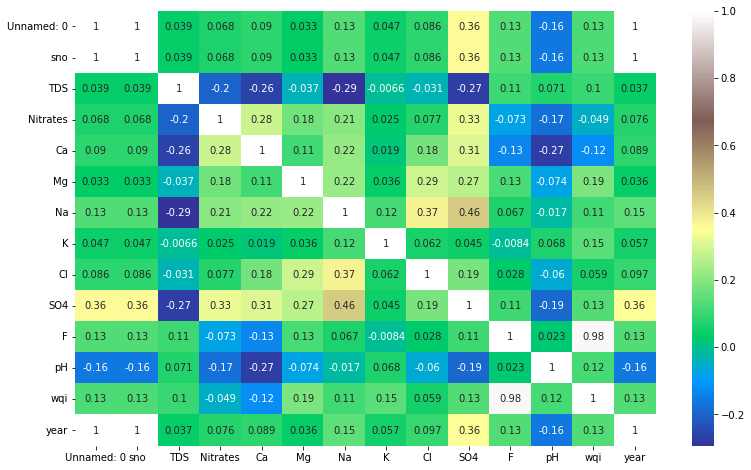

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
l = len(df.year)
l

912

In [ ]:
m=df.year

In [ ]:
#df.iloc[<row selection>, <column selection>]

In [ ]:
dfy=df[['Date','wqi','quality','year']]
dfy

,Date,wqi,quality,year
0,06-01-1981,62.518147,Poor,1981
1,07-01-1981,59.568941,Poor,1981
2,07-01-1981,60.935806,Poor,1981
3,07-01-1981,65.567795,Poor,1981
4,07-01-1981,60.977494,Poor,1981
...,...,...,...,...
907,07-03-2020,80.574606,Very poor,2020
908,07-03-2020,87.819761,Very poor,2020
909,07-03-2020,132.636026,Not suitable,2020
910,07-03-2020,114.080687,Not suitable,2020


In [ ]:
dfy[dfy['year']==1981]

,Date,wqi,quality,year
0,06-01-1981,62.518147,Poor,1981
1,07-01-1981,59.568941,Poor,1981
2,07-01-1981,60.935806,Poor,1981
3,07-01-1981,65.567795,Poor,1981
4,07-01-1981,60.977494,Poor,1981
5,07-01-1981,60.460106,Poor,1981
6,07-01-1981,63.216583,Poor,1981
7,07-01-1981,61.779425,Poor,1981
8,12-01-1981,60.828195,Poor,1981
9,12-01-1981,60.983948,Poor,1981


In [ ]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 1981 to 2020
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wqi      912 non-null    float64
 1   quality  912 non-null    object 
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [ ]:
dfy.set_index("year", inplace=True)
print(dfy.loc['1981'])

KeyError: ignored

In [ ]:
ye=[]

In [ ]:
df2=pd.read_csv('/content/F_Final_vellore_data_wqi.csv')

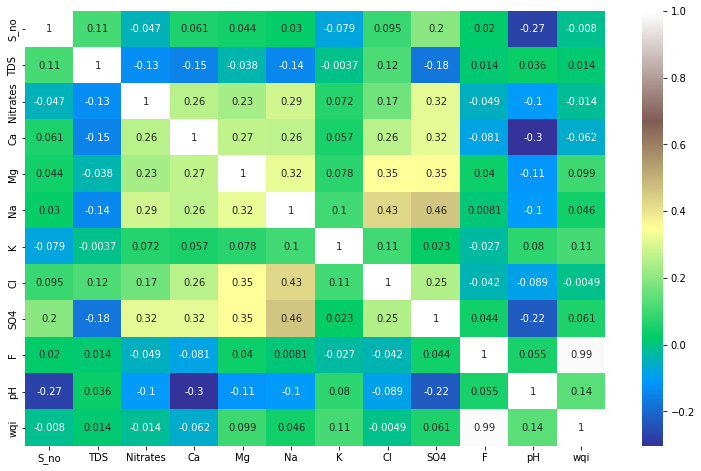

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df2.corr(),annot=True,cmap='terrain')
plt.show()